# Multiple Linear Regression

# Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import dataset

In [2]:
file_path = 'Pract.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,open,high,low,close,volume
0,178.59,179.32,178.26,179.32,9722.0
1,179.32,179.32,178.87,178.87,920.0
2,178.78,179.32,178.67,179.17,3874.0
3,179.17,179.32,179.08,179.08,12018.0
4,179.08,179.12,178.97,179.12,552.0


In [4]:
X = data[['open', 'high', 'low', 'volume']]  # Independent variables
y = data['close']  # Dependent variable

# Data Preprocessing

# Applying Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = data.copy()
normalized_data[['open', 'close', 'high', 'low', 'volume']] = scaler.fit_transform(data[['open', 'close', 'high', 'low', 'volume']])


In [16]:
print(normalized_data)

           open      high       low     close    volume
0      0.481514  0.509883  0.477758  0.517552  0.012077
1      0.514031  0.509883  0.504893  0.497300  0.001143
2      0.489978  0.509883  0.495996  0.510801  0.004813
3      0.507350  0.509883  0.514235  0.506751  0.014930
4      0.503341  0.500898  0.509342  0.508551  0.000686
...         ...       ...       ...       ...       ...
19994  0.932739  0.932165  0.926601  0.933393  0.015436
19995  0.925612  0.924978  0.929715  0.927993  0.001988
19996  0.920267  0.919587  0.923043  0.921242  0.005503
19997  0.913586  0.912848  0.923043  0.921242  0.002189
19998  0.913586  0.913747  0.923932  0.922142  0.001702

[19999 rows x 5 columns]


# Split the dataset into training set and testing set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Multiple Linear Regression

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predicting the values

In [8]:
y_pred = model.predict(X_test)

In [9]:
print(y_pred)

[175.72096183 176.83661067 171.43652285 ... 188.15799448 175.52950273
 172.44938353]


# Evaluating the model

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print(mse)

0.003750238141117844


In [12]:
print(r2)

0.999834490819292


# Visualizing the model

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot matrix for visualizing relationships between variables

Text(0.5, 1.02, 'Scatter Plot Matrix')

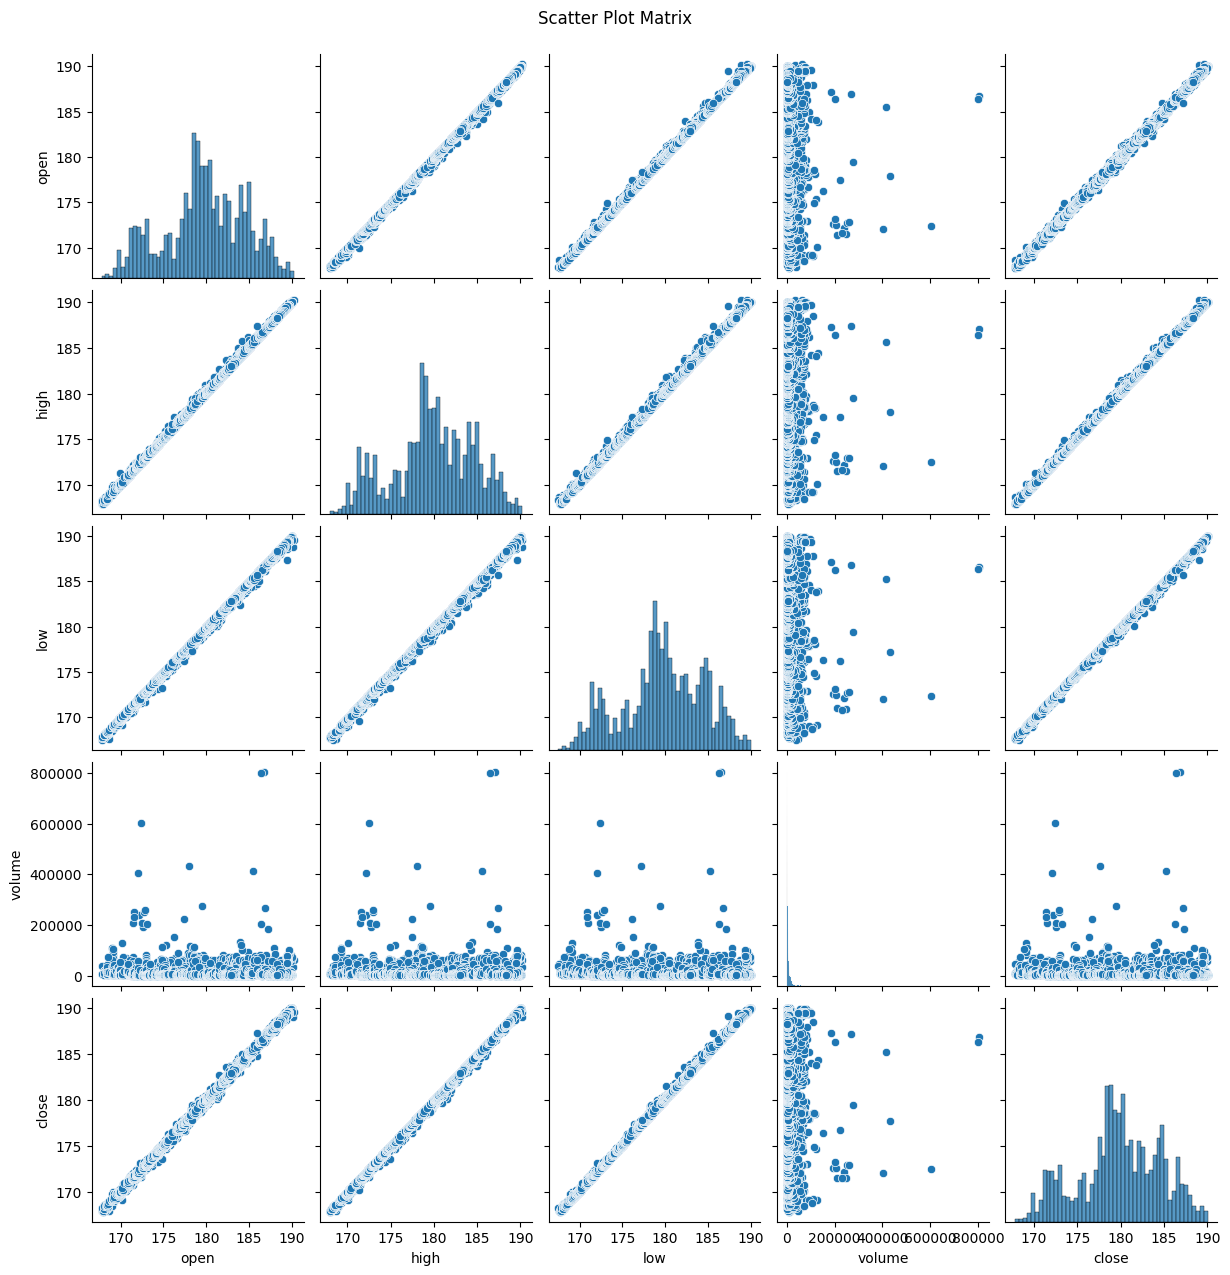

In [18]:
sns.pairplot(data[['open', 'high', 'low', 'volume', 'close']])
plt.suptitle('Scatter Plot Matrix', y=1.02)

# Plotting actual vs predicted values

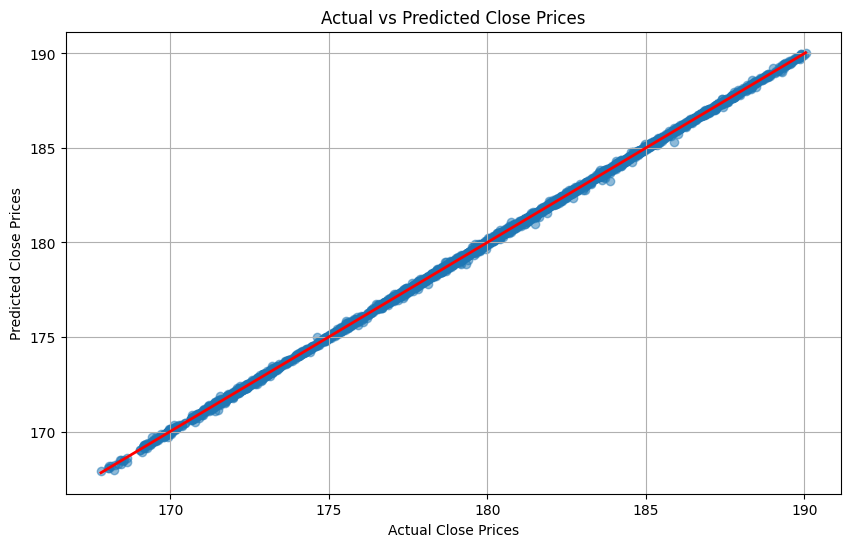

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.grid(True)
plt.show()
